<a href="https://colab.research.google.com/github/shashankag14/OpenPCDet/blob/DA-15-class-balance-imp/tb_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from packaging import version
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [2]:
experiment_id = "wTqPAlH8QyqGCNxSVTOLpQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
print(df)

                                    run                     tag  step  \
0                           test/PR/Car                 test/PR    33   
1                           test/PR/Car                 test/PR    65   
2                           test/PR/Car                 test/PR    97   
3                           test/PR/Car                 test/PR   129   
4                           test/PR/Car                 test/PR   161   
...                                 ...                     ...   ...   
3679  test/trans_err_per_tps/Pedestrian  test/trans_err_per_tps   321   
3680  test/trans_err_per_tps/Pedestrian  test/trans_err_per_tps   353   
3681  test/trans_err_per_tps/Pedestrian  test/trans_err_per_tps   385   
3682  test/trans_err_per_tps/Pedestrian  test/trans_err_per_tps   417   
3683  test/trans_err_per_tps/Pedestrian  test/trans_err_per_tps   449   

         value  
0     0.489364  
1     0.486222  
2     0.461872  
3     0.531781  
4     0.593049  
...        ...  
3679

In [3]:
# print(df["run"].unique())
print(df["tag"].unique())

['test/PR' 'test/fns_per_sample' 'test/fps_per_sample' 'test/mAP_3d'
 'test/mAP_3d_R40' 'test/max_recall' 'test/num_gt_boxes'
 'test/num_pred_boxes' 'test/orient_err_per_tps' 'test/pred_accs'
 'test/pred_fgs' 'test/pred_ious' 'test/scale_err_per_tps'
 'test/score_bgs' 'test/score_fgs' 'test/tps_per_sample'
 'test/trans_err_per_tps']


In [4]:
dfw = experiment.get_scalars(pivot=False) 
dfw

,run,tag,step,value
0,test/PR/Car,test/PR,33,0.489364
1,test/PR/Car,test/PR,65,0.486222
2,test/PR/Car,test/PR,97,0.461872
3,test/PR/Car,test/PR,129,0.531781
4,test/PR/Car,test/PR,161,0.593049
...,...,...,...,...
3679,test/trans_err_per_tps/Pedestrian,test/trans_err_per_tps,321,0.075949
3680,test/trans_err_per_tps/Pedestrian,test/trans_err_per_tps,353,0.079615
3681,test/trans_err_per_tps/Pedestrian,test/trans_err_per_tps,385,0.076503
3682,test/trans_err_per_tps/Pedestrian,test/trans_err_per_tps,417,0.070481


In [5]:
root_dir = os.getcwd()
csv_path = root_dir + '/tb_experiment_1.csv'
dfw.to_csv(csv_path, index=False)
dfw_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(dfw_roundtrip, dfw)

In [6]:
dfw[dfw.run.str.contains("/score_fgs")]

,run,tag,step,value
3143,test/score_fgs/Car,test/score_fgs,5,0.956419
3144,test/score_fgs/Car,test/score_fgs,9,0.974187
3145,test/score_fgs/Car,test/score_fgs,13,0.970273
3146,test/score_fgs/Car,test/score_fgs,17,0.967811
3147,test/score_fgs/Car,test/score_fgs,21,0.976381
...,...,...,...,...
3595,test/score_fgs/cls_agnostic,test/score_fgs,453,0.926840
3596,test/score_fgs/cls_agnostic,test/score_fgs,457,0.958650
3597,test/score_fgs/cls_agnostic,test/score_fgs,461,0.920771
3598,test/score_fgs/cls_agnostic,test/score_fgs,465,0.947925


In [7]:
dfw_score_fgs_car = dfw[dfw.run.str.contains("/score_fgs/Car")]
dfw_score_fgs_ped = dfw[dfw.run.str.contains("/score_fgs/Pedestrian")]
dfw_score_fgs_cyc = dfw[dfw.run.str.contains("/score_fgs/Cyclist")]
dfw_score_fgs_car, dfw_score_fgs_ped, dfw_score_fgs_cyc

(                     run             tag  step     value
 3143  test/score_fgs/Car  test/score_fgs     5  0.956419
 3144  test/score_fgs/Car  test/score_fgs     9  0.974187
 3145  test/score_fgs/Car  test/score_fgs    13  0.970273
 3146  test/score_fgs/Car  test/score_fgs    17  0.967811
 3147  test/score_fgs/Car  test/score_fgs    21  0.976381
 ...                  ...             ...   ...       ...
 3255  test/score_fgs/Car  test/score_fgs   453  0.963411
 3256  test/score_fgs/Car  test/score_fgs   457  0.974060
 3257  test/score_fgs/Car  test/score_fgs   461  0.936239
 3258  test/score_fgs/Car  test/score_fgs   465  0.966952
 3259  test/score_fgs/Car  test/score_fgs   469  0.934535
 
 [117 rows x 4 columns],
                             run             tag  step     value
 3369  test/score_fgs/Pedestrian  test/score_fgs     5  0.696717
 3370  test/score_fgs/Pedestrian  test/score_fgs     9  0.825875
 3371  test/score_fgs/Pedestrian  test/score_fgs    13  0.857395
 3372  test/score

Text(0.5, 1.0, 'score_fgs/Car')

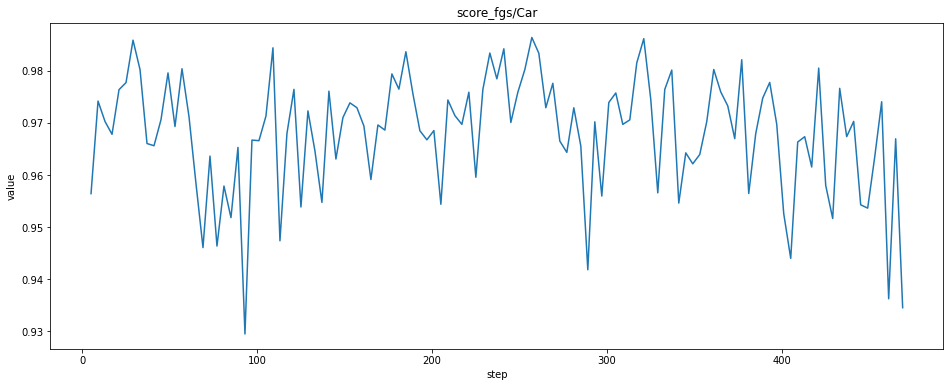

In [8]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=dfw_score_fgs_car, x="step", y="value",
             ).set_title("score_fgs/Car")


Text(0.5, 1.0, 'score_fgs/Pedestrian')

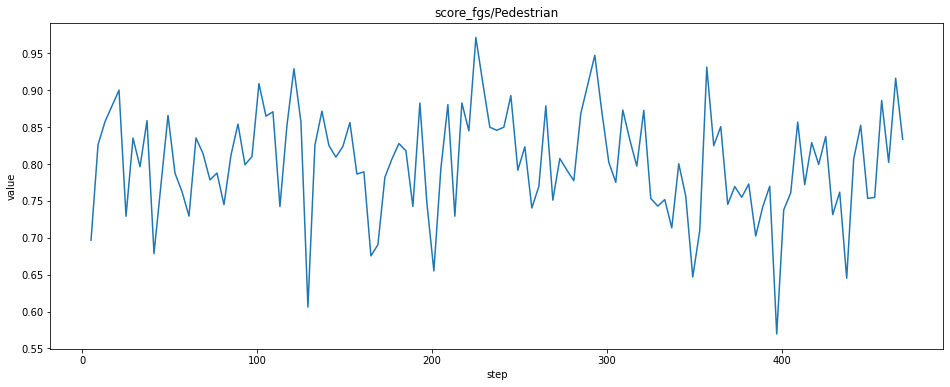

In [9]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=dfw_score_fgs_ped, x="step", y="value",
             ).set_title("score_fgs/Pedestrian")

Text(0.5, 1.0, 'score_fgs/Cyclist')

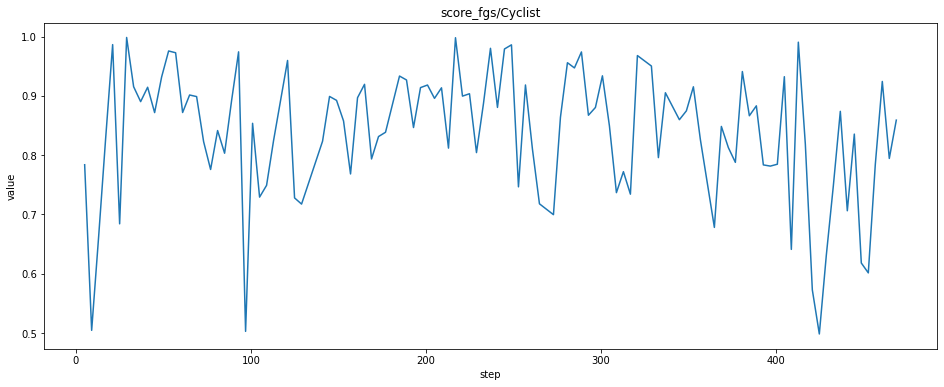

In [10]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=dfw_score_fgs_cyc, x="step", y="value",
             ).set_title("score_fgs/Cyclist")